In [1]:
import numpy as np
import pandas as pd


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


import pickle

import matplotlib.pyplot as plt
import seaborn as sns


# Initial Data preprocessing



In [7]:
paperDf = pd.read_csv('./datasets/Train.csv')
print(f"Dataset size : {len(paperDf)}")
paperDf

Dataset size : 14004


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert one hot encoding to label encoding

In [8]:
def convertOneHotToLabel(df):
    labels = []

    cols = df.columns[2:]

    for ind, row in df.iterrows():

        for ind, val in enumerate(cols):
            if row[val] == 1:
                labels.append(val)
                break

    df['subject'] = labels

convertOneHotToLabel(paperDf)

paperDf.head()


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,subject
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Physics
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science


remove all columns in between

In [9]:
newDf = paperDf.drop(paperDf.columns[2:-1], axis = 1)
newDf.drop('id', axis = 1, inplace = True)
newDf.to_csv("./datasets/label-encoded.csv", index=False)

newDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


# Working with new Dataset

In [2]:
paperDf = pd.read_csv("./datasets/label-encoded.csv")
# paperDf.drop('id', axis = 1, inplace = True)
paperDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


In [5]:
# pipeline class for stemming
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

class Lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized_text = []
        for text in X:
            content = re.sub('[^a-zA-Z]',' ', text)
            content = content.lower().split()
            # content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

            content = [word for word in content if text not in stopwords.words('english')]
            content = ' '.join(content)

            lemmas = [token.lemma_ for token in self.nlp(content)]
            lemmatized_text.append(" ".join(lemmas))
        return lemmatized_text

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

class Stemmer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.port_stem = PorterStemmer()
        

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        stemmed_X = []

        for content in X:
            stemmed_content = re.sub('[^a-zA-Z]',' ',content)
            stemmed_content = stemmed_content.lower()
            stemmed_content = stemmed_content.split()
            stemmed_content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
            stemmed_content = ' '.join(stemmed_content)
            stemmed_X.append(stemmed_content)
        return np.asarray(stemmed_X)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manikmaharjan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manikmaharjan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
%%timeit
Lemmatizer().fit_transform([paperDf['ABSTRACT'][0]])

282 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
Stemmer().fit_transform([paperDf['ABSTRACT'][0]])

13 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Stemming is much faster so we stem instead of lemmatizing

In [11]:
paperDf['stem_abstract'] = Stemmer().fit_transform(paperDf['ABSTRACT'])
paperDf

,ABSTRACT,subject,stem_abstract
0,a ever-growing datasets inside observational a...,Physics,ever grow dataset insid observ astronomi chall...
1,we propose the framework considering optimal $...,Computer Science,propos framework consid optim match exclud pre...
2,nanostructures with open shell transition meta...,Physics,nanostructur open shell transit metal molecula...
3,stars are self-gravitating fluids inside which...,Physics,star self gravit fluid insid pressur buoyanc r...
4,deep neural perception and control networks ar...,Computer Science,deep neural percept control network like key c...
...,...,...,...
13999,a methodology of automatic detection of a even...,Computer Science,methodolog automat detect event basi inform op...
14000,we consider a case inside which the robot has ...,Computer Science,consid case insid robot navig insid unknown en...
14001,despite being usually considered two competing...,Physics,despit usual consid two compet phenomena charg...
14002,we present the framework and its implementatio...,Computer Science,present framework implement reli natur languag...


In [13]:
paperDf.to_csv("./datasets//label-encoded.csv", index=False)

# Split data as X and Y

In [14]:
X = paperDf['stem_abstract']
X[:10]

0    ever grow dataset insid observ astronomi chall...
1    propos framework consid optim match exclud pre...
2    nanostructur open shell transit metal molecula...
3    star self gravit fluid insid pressur buoyanc r...
4    deep neural percept control network like key c...
5    analyz job hop behavior import consid understa...
6    need reason uncertainti insid larg complex mul...
7    period approxim one central topic insid astron...
8    nowaday data compressor appli mani problem tex...
9    insid work mani bodi potenti nb consid radiat ...
Name: stem_abstract, dtype: object

In [15]:
# label encode Y
lc = LabelEncoder()
Y = lc.fit_transform(paperDf['subject'])

print("Labelled classes ", lc.classes_)
Y[:10]

Labelled classes  ['Computer Science' 'Mathematics' 'Physics' 'Statistics']


array([2, 0, 2, 2, 0, 0, 3, 2, 0, 2])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(f"Train size : {len(X_train)}")
print(f"Test size : {len(X_test)}")


Train size : 10503
Test size : 3501


In [17]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)

X_train_vec


<10503x22123 sparse matrix of type '<class 'numpy.float64'>'
	with 728615 stored elements in Compressed Sparse Row format>

In [18]:
df2 = pd.DataFrame(X_train_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names_out())

print(f"Number of features : {df2.shape[1]}")
df2

Number of features : 10503


,0,1,2,3,4,5,6,7,8,9,...,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwicki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zygmund,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zywina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [19]:
# save vectorizer
with open("./models//vectorizer.pkl", "wb") as f:
    f.write(pickle.dumps(vectorizer))


# Testing models

In [34]:
# model metrics
import pickle

def loadModels(modelPath, vectorizerPath):
    with open(modelPath, "rb") as f:
        model = pickle.load(f)

    with open(vectorizerPath, "rb") as f:
        vectorizer = pickle.load(f)
    return model, vectorizer

def showMetrics(testData, truths, model):

    preds = model.predict(testData)
    cm = confusion_matrix(truths, preds)

    names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

    print("Prediction Sample : ", preds)

    print("Confusion Matrix")
    print(cm)
    print("Classification report")
    print(classification_report(truths, preds) )

    print("\nAccuracy : ", accuracy_score(truths, preds))
    print("Precision : ", precision_score(truths, preds, average='micro'))
    print("Recall : ", recall_score(truths, preds, average='micro'))
    
    # plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='ocean')
    
    ax.set(title = "HeatMap of Predictions", xlabel="Predicted", ylabel="Truth")
    
    # ax.set_xticklabels(names)
    # ax.set_yticklabels(names)

    plt.show()

def predictSubject(X_test, y_test, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(X_test)
    X = vectorizer.transform(stemmed_data.astype('U'))
    
    if y_test is not None:
        showMetrics(X, y_test, model)  
    
def predictUnseen(data, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(data)
    X = vectorizer.transform(stemmed_data.astype('U'))

    return model.predict(X)    




In [22]:
# create a custom sklearn model
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier()
adaBoost.fit(X_train_vec, y_train)

with open("./models/adaBoost.pkl", "wb") as f:
    f.write(pickle.dumps(adaBoost))

adaBoost

AdaBoostClassifier()

Prediction Sample :  [0 0 0 ... 1 0 0]
Confusion Matrix
[[1196  195   46   77]
 [  96  446   34   15]
 [  29   37  838    3]
 [ 296   78   23   92]]
Classification report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1514
           1       0.59      0.75      0.66       591
           2       0.89      0.92      0.91       907
           3       0.49      0.19      0.27       489

    accuracy                           0.73      3501
   macro avg       0.68      0.66      0.65      3501
weighted avg       0.72      0.73      0.72      3501


Accuracy :  0.7346472436446729
Precision :  0.7346472436446729
Recall :  0.7346472436446729


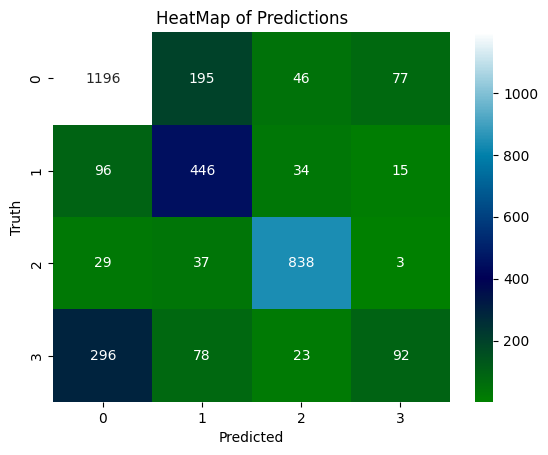

In [35]:
predictSubject(X_test, y_test, 
            "./models/adaBoost.pkl",
            "./models/vectorizer.pkl")

In [36]:
# create a custom sklearn pipeline
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_vec, y_train)

with open("./models/svm.pkl", "wb") as f:
    f.write(pickle.dumps(svm))

svm

SVC()

Prediction Sample :  [0 1 0 ... 1 0 0]
Confusion Matrix
[[1453   28    4   29]
 [  75  473   13   30]
 [  19   14  869    5]
 [ 307   31    5  146]]
Classification report
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1514
           1       0.87      0.80      0.83       591
           2       0.98      0.96      0.97       907
           3       0.70      0.30      0.42       489

    accuracy                           0.84      3501
   macro avg       0.83      0.75      0.77      3501
weighted avg       0.83      0.84      0.82      3501


Accuracy :  0.8400457012282205
Precision :  0.8400457012282205
Recall :  0.8400457012282205


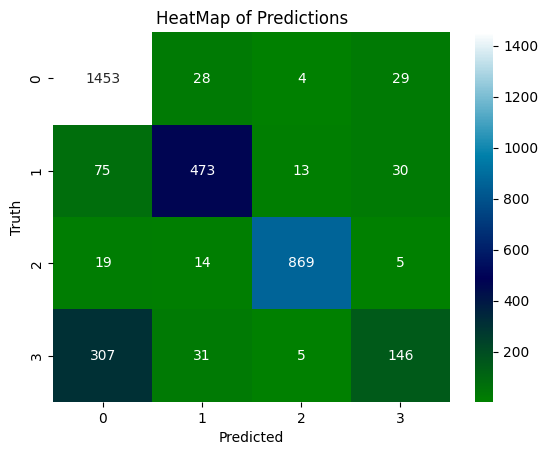

In [37]:
predictSubject(X_test, y_test, 
            "./models/svm.pkl",
            "./models/vectorizer.pkl")

## Test on coventry data

In [38]:
papers = pd.read_json("./scrapedData/papers1.json")

papers.head()

,link,title,journal,journalLink,date,volume,pages,numberofpages,type_classification,doi,authors,tags,coventryAuthors,abstract
0,https://pureportal.coventry.ac.uk/en/publicati...,Associations between sleep-related heart rate ...,Associations between sleep-related heart rate ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,101,106-117,12.0,Review article,https://doi.org/10.1016/j.sleep.2022.10.018,"[Arron Taylor Lund Correia, Gosia Lipinska, H....","[Anxiety, Autonomic nervous system, Depression...",[https://pureportal.coventry.ac.uk/en/persons/...,There is a bidirectional relationship between ...
1,https://pureportal.coventry.ac.uk/en/publicati...,A stochastic model of edge-localized modes in ...,A stochastic model of edge-localized modes in ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-20,381,NaN,16.0,Article,https://doi.org/10.1098/rsta.2021.0226,"[Eun-jin Kim, Rainer Hollerbach]","[High-confinement mode, statistical theory, se...",[https://pureportal.coventry.ac.uk/en/persons/...,Magnetically confined plasmas are far from equ...
2,https://pureportal.coventry.ac.uk/en/publicati...,A study on the effects of laser shock peening ...,A study on the effects of laser shock peening ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-07-01,316,NaN,11.0,Article,https://doi.org/10.1016/j.jmatprotec.2023.117959,"[J. R.O. Leo, S. Zabeen, M. E. Fitzpatrick, J....","[Ti-6Al-4V, Powder bed fusion, Laser shock pee...",[https://pureportal.coventry.ac.uk/en/persons/...,Ti‐6Al‐4V was fabricated by powder-bed fusion ...
3,https://pureportal.coventry.ac.uk/en/publicati...,A systematic review of factors leading to occu...,A systematic review of factors leading to occu...,https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,31,99-113,15.0,Review article,https://doi.org/10.1007/s10389-020-01427-4,"[Joana Eva Dodoo, Hosam Al-Samarraie]","[Occupational safety, Organizational factors, ...",[],Purpose: The burden of health and safety relat...
4,https://pureportal.coventry.ac.uk/en/publicati...,A Systematic Review of In-Vehicle Physiologica...,A Systematic Review of In-Vehicle Physiologica...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-16,23,NaN,18.0,Review article,https://doi.org/10.3390/s23042214,"[Ashwini Kanakapura Sriranga, Qian Lu, Stewart...","[HR, HRV, conditional automation, mental workl...",[https://pureportal.coventry.ac.uk/en/persons/...,The concept of vehicle automation ceases to se...


In [39]:
ind = 100
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['COVID-19', 'Cyber crisis response', 'Cybersecurity capabilities', 'Digital resilience', 'cybersecurity performance']


"Purpose: This research addresses the relationships between the current, dynamic organisational cyber risk climate, organisational cybersecurity performance and changes in cybersecurity investments, with an aim to address the hostile epistemic climate for intellectual capital management presented by the dynamics of cybersecurity as a phenomenon. Design/methodology/approach: Expanding on the views of digital security and resilience as a knowledge problem, the research looks at cybersecurity as a critical capability within organisations, particularly relevant in critical infrastructure sectors. The problem is studied from the perspective of 400 C-level executives from critical infrastructure sectors across the UK. Data collected at the peak of the coronavirus disease 2019 (COVID-19) pandemic, a time when critical infrastructure organisations have been under a significant strain due to an increase in cybersecurity incidents, were analysed using partial least square structural equation mod

In [40]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], './models/adaBoost.pkl', './models/vectorizer.pkl')
names[pred[0]]

'Computer Science'

In [75]:
ind = 345
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['community garden', 'crop productivity', 'multifunctional urban agriculture', 'environmental efficient urban agriculture', 'social benefits']


'The extensive and burgeoning literature on the productivity of urban farms and gardens is largely focused on measures of crop yield and resource use, with little offered to date on their contribution to social productivity and sustainability. This paper suggests that evaluation of urban agriculture should consider all types of resource consumption and productivity simultaneously. The research reported here used a citizen science approach to collect data from seven community gardens and one community farm in London, UK in the 2019 and 2020 growing seasons. The paper examines the many variables that impact the sites’ overall performance, highlighting the complex nature and relationship between the many benefits and outcomes of urban farms and gardens. Data are presented on crop yield, equivalent fruit and vegetable portions, input use (including water and fertilizer), journeys made to the garden by volunteers, social benefits, and social outreach. Results show very mixed levels of crop 

In [76]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen(papers.iloc[ind].abstract, './models/adaBoost.pkl', './models/vectorizer.pkl')
names[pred[0]]

'Mathematics'